In [7]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

# Where to save the figures
ROOT_DIR = "."

import pandas as pd

crime = pd.read_csv("Crime_Data_from_2010_to_Present.csv")


In [44]:
crime.info()
crime.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110218 entries, 0 to 2110217
Data columns (total 28 columns):
DR_NO             int64
Date Rptd         object
DATE OCC          object
TIME OCC          int64
AREA              int64
AREA NAME         object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc       object
Mocodes           object
Vict Age          int64
Vict Sex          object
Vict Descent      object
Premis Cd         float64
Premis Desc       object
Weapon Used Cd    float64
Weapon Desc       object
Status            object
Status Desc       object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION          object
Cross Street      object
LAT               float64
LON               float64
dtypes: float64(8), int64(7), object(13)
memory usage: 450.8+ MB


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [55]:
#looking for duplicate cases marked pts 1 and 2
crime.loc[crime["Date Rptd"]=="08/09/2010 12:00:00 AM"]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
4277,100115260,08/09/2010 12:00:00 AM,08/07/2010 12:00:00 AM,1945,1,Central,119,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,500 RAMIREZ ST,NaN,34.0552,-118.2322
4281,100115268,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,115,1,Central,155,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,5TH ST,SAN JULIAN ST,34.0446,-118.2450
4282,100115269,08/09/2010 12:00:00 AM,07/29/2010 12:00:00 AM,1515,1,Central,155,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0446,-118.2490
4284,100115272,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1200,1,Central,195,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,1300 S MAIN ST,NaN,34.0364,-118.2603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196590,102115569,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1230,21,Topanga,2106,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,8900 ETON AV,NaN,34.2320,-118.5951
196591,102115570,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1430,21,Topanga,2156,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,AA,Adult Arrest,442.0,NaN,NaN,NaN,6700 TOPANGA CANYON BL,NaN,34.1926,-118.6059
196595,102115576,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,2200,21,Topanga,2126,1,210,ROBBERY,...,AA,Adult Arrest,210.0,998.0,NaN,NaN,VARIEL AV,ROSCOE BL,34.2199,-118.5929
196617,102115630,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,505,21,Topanga,2105,2,951,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 &...",...,IC,Invest Cont,951.0,NaN,NaN,NaN,8300 TOPANGA CANYON BL,NaN,34.2197,-118.6060


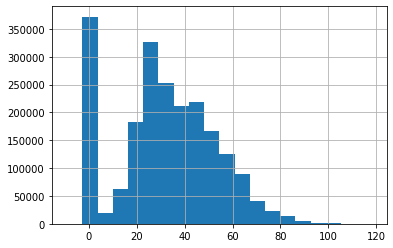

In [56]:
#hist of victim age
crime["Vict Age"].hist(bins=20)
plt.show()

In [87]:
#get rid of irrelevant categories
updatedCrime=crime.drop(columns=['DR_NO', 'Date Rptd', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd Desc', 'Mocodes', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Weapon Used Cd'])
updatedCrime.head()

,DATE OCC,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Status,LOCATION,LAT,LON
0,02/20/2010 12:00:00 AM,1350,13,900,48,M,H,501.0,AA,300 E GAGE AV,33.9825,-118.2695
1,09/12/2010 12:00:00 AM,45,14,740,0,M,W,101.0,IC,SEPULVEDA BL,33.9599,-118.3962
2,08/09/2010 12:00:00 AM,1515,13,946,0,M,H,103.0,IC,1300 E 21ST ST,34.0224,-118.2524
3,01/05/2010 12:00:00 AM,150,6,900,47,F,W,101.0,IC,CAHUENGA BL,34.1016,-118.3295
4,01/02/2010 12:00:00 AM,2100,1,122,47,F,H,103.0,IC,8TH ST,34.0387,-118.2488


In [99]:
updatedCrime["Vict Sex"].value_counts()

M    972208
F    886945
X     54426
H        73
N        17
-         1
Name: Vict Sex, dtype: int64

In [105]:
updatedCrime.dropna(subset = ["Vict Sex"], inplace=True)
updatedCrime.dropna(subset = ["Vict Descent"], inplace=True)
updatedCrime.dropna(subset = list(updatedCrime), inplace=True)

updatedCrime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913591 entries, 0 to 2110217
Data columns (total 12 columns):
DATE OCC        object
TIME OCC        int64
AREA            int64
Crm Cd          int64
Vict Age        int64
Vict Sex        object
Vict Descent    object
Premis Cd       float64
Status          object
LOCATION        object
LAT             float64
LON             float64
dtypes: float64(3), int64(4), object(5)
memory usage: 189.8+ MB


In [106]:
#percentage of og data set remaining w/o null value cases
1913591/2110218

0.9068214753167683